# Example notebook
### This notebook provides an example of reading files in this repository and plotting the contours stored in these files.

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

datadir_root = './'
outdir = datadir_root

In [2]:
# read in and process results from the Weighing the Giants analysis
datadir_wtg = os.path.join(datadir_root, 'WeighingTheGiants_1407.4516')
infile_wtg = os.path.join(datadir_wtg, 'flcdm__om_s8__clusters.dat')
data_wtg = np.genfromtxt(infile_wtg)

# x_wtg = data_wtg[:,0]
# y_wtg = data_wtg[:,1]

In [3]:
# read in and process results from the Planck 2018 analysis
datadir_planck18 = os.path.join(datadir_root, 'Planck_1807.06209')
infile_planck18 = os.path.join(datadir_planck18, 'oms8_cmb_s2.dat')
data_planck18 = np.genfromtxt(infile_planck18)

# x_planck18 = data_planck18[:,0]
# y_planck18 = data_planck18[:,1]

In [4]:
# read in and process results from the DES 6x2pt+N analysis

# 4x2pt + N
datadir_4x2pt_plus_N = os.path.join(datadir_root, 'DES_6x2pt+N_2010.01138')
infile_4x2pt_plus_N = os.path.join(datadir_4x2pt_plus_N, 'figure3_4x2pt+N.dat')
data_4x2pt_plus_N = np.genfromtxt(infile_4x2pt_plus_N, delimiter=',')

# x_4x2pt_plus_N = data_4x2pt_plus_N[:,0]
# y_4x2pt_plus_N = data_4x2pt_plus_N[:,1]

# 6x2pt + N
datadir_6x2pt_plus_N = os.path.join(datadir_root, 'DES_6x2pt+N_2010.01138')
infile_6x2pt_plus_N = os.path.join(datadir_6x2pt_plus_N, 'figure3_6x2pt+N.dat')
data_6x2pt_plus_N = np.genfromtxt(infile_6x2pt_plus_N, delimiter=',')

# x_6x2pt_plus_N = data_6x2pt_plus_N[:,0]
# y_6x2pt_plus_N = data_6x2pt_plus_N[:,1]

Wrote ./contours.pdf


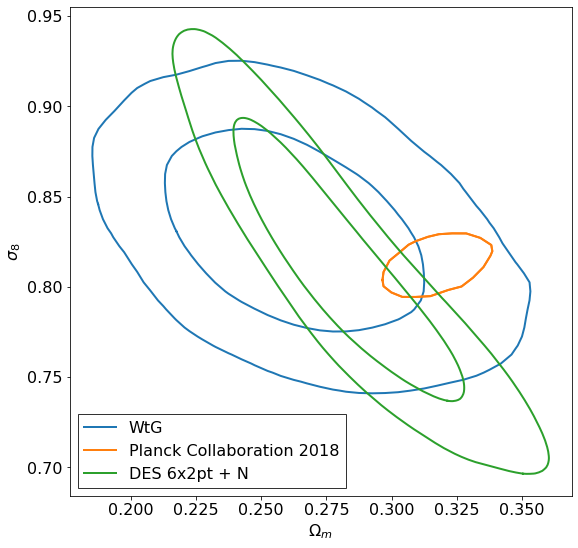

In [6]:
# plot loaded contours
kwargs_style = {'lw' : 2}
fontsize = 16
fig, ax = plt.subplots(1,1, figsize=(9,9))

contours = [data_wtg, data_planck18, data_6x2pt_plus_N]
labels = ['WtG', 'Planck Collaboration 2018', 'DES 6x2pt + N']
colors = ['tab:blue', 'tab:orange', 'tab:green']

for i, (data, label) in enumerate(zip(contours, labels)):
    x, y = data[:,0], data[:,1]
    
    # find index marking the split between 2 and 3 sigma contours, if it exists
    dist_btwn_pts = (x[1:] - x[:-1]) ** 2 + (y[1:] - y[:-1]) ** 2
    avg_dist_btw_pts = np.median(dist_btwn_pts)
    max_dist_btw_pts = np.max(dist_btwn_pts)
    if max_dist_btw_pts / avg_dist_btw_pts > 10: # this is a guestimate to find if there is a split
        idx_split_contours = np.argmax(dist_btwn_pts) + 1
    else:
        idx_split_contours = None
    
    # plot contours
    ax.plot(x[:idx_split_contours], y[:idx_split_contours], label=label, color=colors[i], **kwargs_style)
    ax.plot(x[idx_split_contours:], y[idx_split_contours:], color=colors[i], **kwargs_style)

ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.set_xlabel(r'$\Omega_m$', fontsize=fontsize)
ax.set_ylabel(r'$\sigma_8$', fontsize=fontsize)
ax.legend(fontsize=fontsize, fancybox=False, edgecolor='k')

outfile = os.path.join(outdir, 'contours.pdf')
fig.savefig(outfile)
print('Wrote {}'.format(outfile))